In [96]:
import pandas as pd
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

import matplotlib.pyplot as plt

In [97]:
all_data = pd.read_csv('dataset_group.csv',header=None)
#В файле нет строки с названием столбцов, поэтому параметр header равен None.
#Интерес представляет информация об id покупателя - столбец с названием 1
#Название купленного товара хранится в столбце с названием 2

In [98]:
all_data

,0,1,2
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


In [99]:
# Получим список всех id покупателей, которые есть в файле.

unique_id = list(set(all_data[1]))
print(len(unique_id)) #Выведем количество id

1139


In [100]:
# Получим список всех товаров, которые есть в файле

items = list(set(all_data[2]))
print(len(items)) #Выведем количество товаров

38


In [101]:
#  Далее необходимо сформировать датасет подходящий для частотного анализа. Для 
# этого надо слить все товары одного покупателя в один список. 
# Для дальнейшего частотного анализа id покупателя будет не нужен

dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
items] for id in unique_id]

In [102]:
dataset[0]

['yogurt',
 'pork',
 'sandwich bags',
 'lunch meat',
 'all- purpose',
 'flour',
 'soda',
 'butter',
 'vegetables',
 'beef',
 'aluminum foil',
 'all- purpose',
 'dinner rolls',
 'shampoo',
 'all- purpose',
 'mixes',
 'soap',
 'laundry detergent',
 'ice cream',
 'dinner rolls']

## Подготовка данных

In [103]:
# Так как полученные датасет не пригоден для анализа напрямую, 
# так как каждый список пользователя может содержать разное количество товаров. 
# Поэтому данные надо закодировать так, чтобы их можно было представить в 
# виде матрицы. Для кодированния данных используем TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)


In [104]:
df.head()

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True


## Ассоциативный анализ с использованием алгоритма Apriori

In [105]:
# Применим алгоритм apriori с минимальным уровнем поддержки 0.3

results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) 
# добавление размера набора
print(results)

     support                                    itemsets  length
0   0.374890                              (all- purpose)       1
1   0.384548                             (aluminum foil)       1
2   0.385426                                    (bagels)       1
3   0.374890                                      (beef)       1
4   0.367867                                    (butter)       1
5   0.395961                                   (cereals)       1
6   0.390694                                   (cheeses)       1
7   0.379280                                (coffee/tea)       1
8   0.388938                              (dinner rolls)       1
9   0.388060              (dishwashing liquid/detergent)       1
10  0.389816                                      (eggs)       1
11  0.352941                                     (flour)       1
12  0.370500                                    (fruits)       1
13  0.345917                                 (hand soap)       1
14  0.398595             

In [106]:
# Применим алгоритм apriori с тем же уровнем поддержки, 
# но ограничим максимальный размер набора единицей

results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

     support                        itemsets
0   0.374890                  (all- purpose)
1   0.384548                 (aluminum foil)
2   0.385426                        (bagels)
3   0.374890                          (beef)
4   0.367867                        (butter)
5   0.395961                       (cereals)
6   0.390694                       (cheeses)
7   0.379280                    (coffee/tea)
8   0.388938                  (dinner rolls)
9   0.388060  (dishwashing liquid/detergent)
10  0.389816                          (eggs)
11  0.352941                         (flour)
12  0.370500                        (fruits)
13  0.345917                     (hand soap)
14  0.398595                     (ice cream)
15  0.375768              (individual meals)
16  0.376646                         (juice)
17  0.371378                       (ketchup)
18  0.378402             (laundry detergent)
19  0.395083                    (lunch meat)
20  0.380158                          (milk)
21  0.3757

In [110]:
# Применим алгоритм apriori и выведем только те наборы, 
# которые имеют размер 2, а также количество таких наборов


results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nCount of result itemstes = ',len(results))

     support                                    itemsets  length
38  0.310799                 (aluminum foil, vegetables)       2
39  0.300263                        (bagels, vegetables)       2
40  0.310799                       (cereals, vegetables)       2
41  0.309043                       (cheeses, vegetables)       2
42  0.308165                  (vegetables, dinner rolls)       2
43  0.306409  (vegetables, dishwashing liquid/detergent)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (vegetables, ice cream)       2
46  0.309043             (laundry detergent, vegetables)       2
47  0.311677                    (lunch meat, vegetables)       2
48  0.331870                       (vegetables, poultry)       2
49  0.305531                          (soda, vegetables)       2
50  0.315189                       (waffles, vegetables)       2
51  0.319579                        (vegetables, yogurt)       2

Count of result itemstes

No more set with length 4, support level 0.09000000000000001
No more set with length 3, support level 0.17000000000000004
No more set with length 2, support level 0.34
No more set with length 1, support level 0.7400000000000002
No more set with length nan, support level 0.7500000000000002
No more set with length nan, support level 0.7600000000000002
No more set with length nan, support level 0.7700000000000002
No more set with length nan, support level 0.7800000000000001
No more set with length nan, support level 0.7900000000000001
No more set with length nan, support level 0.8000000000000002
No more set with length nan, support level 0.8100000000000002
No more set with length nan, support level 0.8200000000000002
No more set with length nan, support level 0.8300000000000002
No more set with length nan, support level 0.8400000000000002
No more set with length nan, support level 0.8500000000000002
No more set with length nan, support level 0.8600000000000002
No more set with length nan,

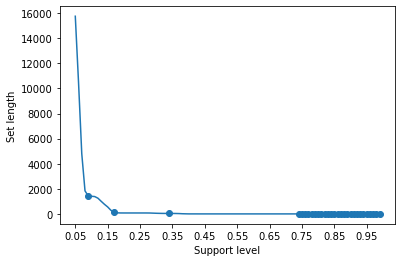

In [90]:
# Посчитайте количество наборов при различных уровнях поддержки. 
# Начальное значение поддержки 0.05, шаг 0.01. 
# Постройте график зависимости количества наборов от уровня поддержки


# Определите значение уровня поддержки при котором перестают 
# генерироваться наборы размера 1,2,3, и.т.д. 
# Отметьте полученные уровни поддержки на графике


res = {}
no_set = {}
max_set_length = -1
for support in np.arange(.05, 1, .01):
    results = apriori(df, min_support=support, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    res[support] = len(results)
    if max_set_length <= 0:
        max_set_length = results['length'].max()
    if max_set_length not in set(results['length']):
        no_set[support] = len(results)
        print(f"No more set with length {max_set_length}, support level {support}")
        max_set_length -= 1



plt.plot(list(res.keys()), list(res.values()))
plt.scatter(list(no_set.keys()), list(no_set.values()))
plt.xlabel("Support level")
plt.ylabel("Set length")
plt.xticks(np.arange(.05,
                     1,
                     .1))
plt.show()

In [108]:
# Построим датасет только из тех элементов, которые попадают в наборы 
# размером 1 при уровне поддержки 0.38

results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
new_items] for id in unique_id]

In [109]:
# Приведите полученный датасет к формату, который можно обработать


te = TransactionEncoder()
new_dataset_df = pd.DataFrame(
    te.fit(new_dataset).transform(new_dataset),
    columns=te.columns_
)

new_dataset_df

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


In [111]:
# Проведите ассоциативный анализ при уровне поддержки 0.3 для нового датасета.
# Опишите в чем сходства и различия


new_results = apriori(new_dataset_df, min_support=0.3, use_colnames=True)
new_results['length'] = new_results['itemsets'].apply(lambda x: len(x))

print(new_results)
print()
print(results)

     support                                    itemsets  length
0   0.384548                             (aluminum foil)       1
1   0.385426                                    (bagels)       1
2   0.395961                                   (cereals)       1
3   0.390694                                   (cheeses)       1
4   0.388938                              (dinner rolls)       1
5   0.388060              (dishwashing liquid/detergent)       1
6   0.389816                                      (eggs)       1
7   0.398595                                 (ice cream)       1
8   0.395083                                (lunch meat)       1
9   0.380158                                      (milk)       1
10  0.421422                                   (poultry)       1
11  0.390694                                      (soda)       1
12  0.739245                                (vegetables)       1
13  0.394205                                   (waffles)       1
14  0.384548             

In [57]:
# Проведите ассоциативный анализ при уровне поддержки 0.15 для нового датасета.
# Выведите все наборы размер которых больше 1 и в котором есть 
# 'yogurt' или 'waffles'


new_results = apriori(new_dataset_df, min_support=0.15, use_colnames=True)
new_results['length'] = new_results['itemsets'].apply(lambda x: len(x))

new_results['contains'] = new_results['itemsets'].apply(
    lambda tpl: 'yogurt' in tpl or 'waffles' in tpl
)

filter_results_df = \
new_results[new_results['contains'] == True][new_results["length"] > 1].copy()
filter_results_df

<ipython-input-57-984fa1fdfcb0>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_results[new_results['contains'] == True][new_results["length"] > 1].copy()


,support,itemsets,length,contains
27,0.169447,"(aluminum foil, waffles)",2,True
28,0.177349,"(aluminum foil, yogurt)",2,True
40,0.159789,"(bagels, waffles)",2,True
41,0.162423,"(bagels, yogurt)",2,True
52,0.160667,"(cereals, waffles)",2,True
53,0.172081,"(cereals, yogurt)",2,True
63,0.172959,"(cheeses, waffles)",2,True
64,0.172081,"(cheeses, yogurt)",2,True
73,0.169447,"(waffles, dinner rolls)",2,True
74,0.166813,"(yogurt, dinner rolls)",2,True


In [62]:
# Постройте датасет, из тех элементов, которые не попали в датасет в п. 6 
# и приведите его к удобному для анализа виду


results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in new_items] for id in unique_id]

rest_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem not in new_items] for id in unique_id]

te = TransactionEncoder()
te_ary = te.fit(rest_dataset).transform(rest_dataset)
not_catched_df = pd.DataFrame(te_ary, columns=te.columns_)
not_catched_df

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


In [65]:
# Проведите анализ aprioti для полученного датасета

results = apriori(not_catched_df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # добавление размера набора
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.374890,(beef),1
2,0.367867,(butter),1
3,0.379280,(coffee/tea),1
4,0.352941,(flour),1
5,0.370500,(fruits),1
6,0.345917,(hand soap),1
7,0.375768,(individual meals),1
8,0.376646,(juice),1
9,0.371378,(ketchup),1


In [70]:
# Напишите правило, для вывода всех наборов, 
# в которых хотя бы два элемента начинаются на 's'

results = apriori(df, min_support=0.1, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) # добавление размера набора
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
...,...,...,...
1401,0.135206,"(waffles, vegetables, toilet paper)",3
1402,0.130817,"(yogurt, vegetables, toilet paper)",3
1403,0.121159,"(tortillas, waffles, vegetables)",3
1404,0.130817,"(tortillas, vegetables, yogurt)",3


In [73]:
results['rule_with_s'] = results['itemsets']\
    .apply(lambda tpl: len([name for name in tpl if name.startswith('s')]) >= 2)
results[results['rule_with_s'] == True]

,support,itemsets,length,rule_with_s
675,0.137840,"(sandwich bags, sandwich loaves)",2,True
676,0.146620,"(sandwich bags, shampoo)",2,True
677,0.158911,"(sandwich bags, soap)",2,True
678,0.162423,"(sandwich bags, soda)",2,True
679,0.147498,"(sandwich bags, spaghetti sauce)",2,True
680,0.131694,"(sandwich bags, sugar)",2,True
686,0.150132,"(shampoo, sandwich loaves)",2,True
687,0.158033,"(soap, sandwich loaves)",2,True
688,0.141352,"(soda, sandwich loaves)",2,True
689,0.150132,"(sandwich loaves, spaghetti sauce)",2,True


In [77]:
# Напишите правило, для вывода всех наборов, для которых уровень 
# поддержки изменяется от 0.1 до 0.25

results.query("support >= .1 and support <=.25 ")

,support,itemsets,length,rule_with_s
38,0.157155,"(aluminum foil, all- purpose)",2,False
39,0.150132,"(bagels, all- purpose)",2,False
40,0.144864,"(beef, all- purpose)",2,False
41,0.147498,"(butter, all- purpose)",2,False
42,0.151010,"(cereals, all- purpose)",2,False
...,...,...,...,...
1401,0.135206,"(waffles, vegetables, toilet paper)",3,False
1402,0.130817,"(yogurt, vegetables, toilet paper)",3,False
1403,0.121159,"(tortillas, waffles, vegetables)",3,False
1404,0.130817,"(tortillas, vegetables, yogurt)",3,False
